# Dataset

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [3]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser='auto')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)
len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

El set de datos considera como variable independiente la imagen y variable dependiente la etiqueta con el número correspondiente. Por tanto,
para "X" es una img y para "y" es la etiqueta de la img.

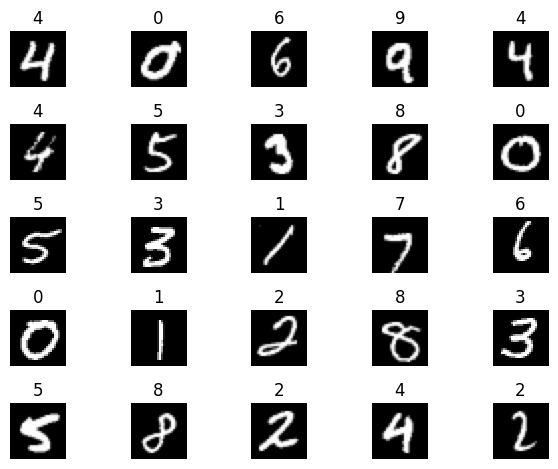

In [5]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(dpi=100)
for ix in range(25):
    ax = plt.subplot(5, 5, ix + 1)
    i = random.randint(0, len(X_train)-1)
    img, label = X_train[i], y_train[i]
    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.set_title(label)
    ax.axis('off')
plt.tight_layout()
plt.show()

Ahora haremos un clasificador binario que detecte sólo el "3". Usaremos una pequeña muestra para ello

In [6]:
import numpy as np

X_train_3 = X_train[y_train == '3'][:100]
X_train_no_3 = X_train[y_train != '3'][:100]

len(X_train_3), len(X_train_no_3)

(100, 100)

In [7]:
def plot_samples(X):
    fig = plt.figure(dpi=100)
    for ix in range(25):
        ax = plt.subplot(5, 5, ix + 1)
        i = random.randint(0, len(X)-1)
        img = X[i]
        ax.imshow(img.reshape(28, 28), cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

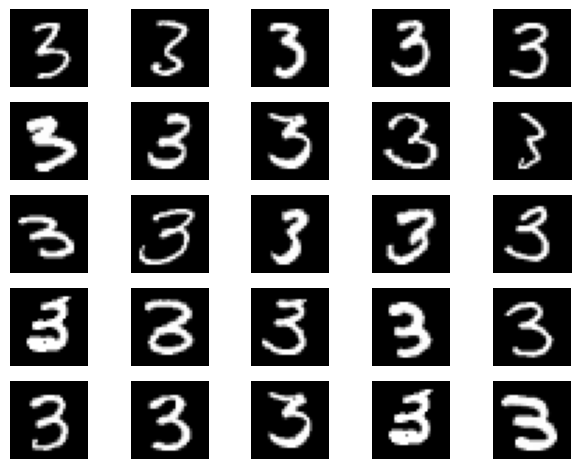

In [8]:
plot_samples(X_train_3)

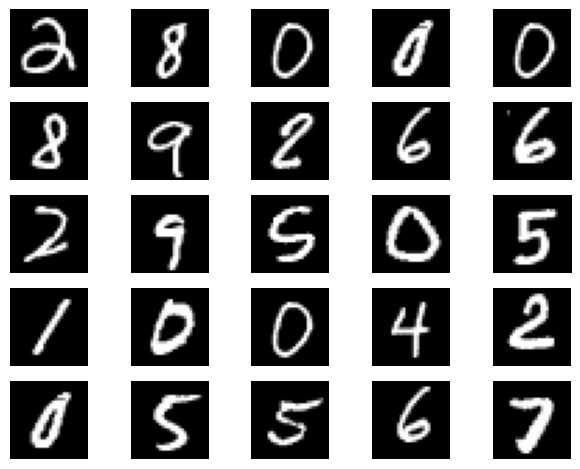

In [9]:
plot_samples(X_train_no_3)

Se creará una carpeta llamada 'dataset' que contendrá imágenes que correspondan a 3 y no_3 separadas en carpetas de train y test.

In [10]:
import os
from pathlib import Path
from skimage.io import imsave
import shutil

path = Path('dataset')

def generate_dataset(X_train_3, X_train_no_3, test_size):
    shutil.rmtree(path)
    os.makedirs(path, exist_ok=True)

    splits = ['train', 'test']
    for split in splits:
        os.makedirs(path / split, exist_ok=True)
        os.makedirs(path / split / '3', exist_ok=True)
        os.makedirs(path / split / 'no3', exist_ok=True)
        if split == 'train':
            X1, X2 = X_train_3[:-test_size], X_train_no_3[:-test_size]
        else:
            X1, X2 = X_train_3[-test_size:], X_train_no_3[-test_size:]
        for x1, x2 in zip(X1, X2):
            imsave(path / split / '3' / f'{random.randint(0, 99999):05d}.png', x1.reshape(28,28).astype('uint8'))
            imsave(path / split / 'no3' / f'{random.randint(0, 99999):05d}.png', x2.reshape(28,28).astype('uint8'))


In [11]:
generate_dataset(X_train_3, X_train_no_3, 20)

In [12]:
from glob import glob

def get_paths():
    train_3 = glob(str(path / 'train' / '3' / '*.png'))
    train_no3 = glob(str(path / 'train' / 'no3' / '*.png'))
    test_3 = glob(str(path / 'test' / '3' / '*.png'))
    test_no3 = glob(str(path / 'test' / 'no3' / '*.png'))
    return train_3, train_no3, test_3, test_no3

train_3, train_no3, test_3, test_no3 = get_paths()

len(train_3), len(train_no3), len(test_3), len(test_no3)

(80, 80, 20, 20)

In [13]:
from skimage.io import imread

def plot_images(paths):
    fig = plt.figure(dpi=100)
    for ix in range(25):
        ax = plt.subplot(5, 5, ix + 1)
        i = random.randint(0, len(paths)-1)
        img = imread(paths[i])
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

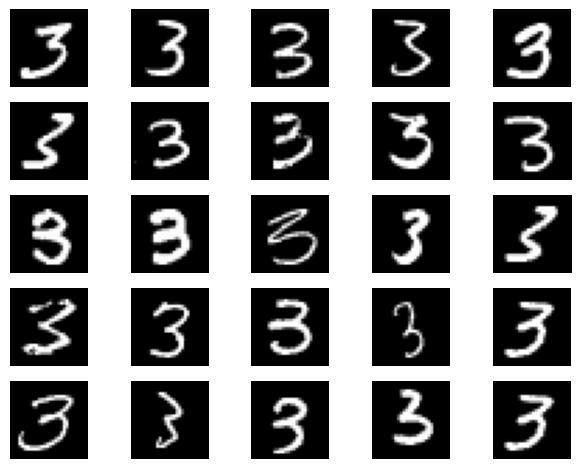

In [14]:
plot_images(train_3)

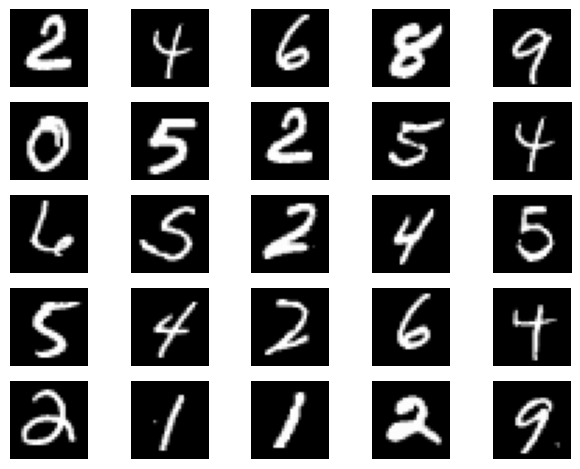

In [15]:
plot_images(train_no3)

Veamos versiones de prueba

In [28]:
# Versión 0 con 80/20 split
train_3, train_no3, test_3, test_no3 = get_paths()

len(train_3), len(train_no3), len(test_3), len(test_no3)

(160, 160, 40, 40)

In [36]:
# Version 2 con 320/80 split
X_train_3 = X_train[y_train == '3'][:400]
X_train_no_3 = X_train[y_train != '3'][:400]

len(X_train_3), len(X_train_no_3)

(400, 400)

In [37]:
# 400 img
generate_dataset(X_train_3, X_train_no_3, 80)

In [42]:
# 400 img
train_3, train_no3, test_3, test_no3 = get_paths()

len(train_3), len(train_no3), len(test_3), len(test_no3)

(320, 320, 80, 80)